In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [5]:
cit_uta = pd.read_csv("../data/raw/ScopusExport_56046313500.csv")
cit_uta["coverDate"] = pd.to_datetime(cit_uta["coverDate"])
cit_uta["year"] = cit_uta["coverDate"].dt.year
cit_uta["decade"] = cit_uta["year"] // 10 * 10

cit_chris = pd.read_csv("../data/raw/ScopusExport_36051252900.csv")
cit_chris["coverDate"] = pd.to_datetime(cit_chris["coverDate"])
cit_chris["year"] = cit_chris["coverDate"].dt.year
cit_chris["decade"] = cit_chris["year"] // 10 * 10

<Axes: xlabel='coverDate', ylabel='citedby_count'>

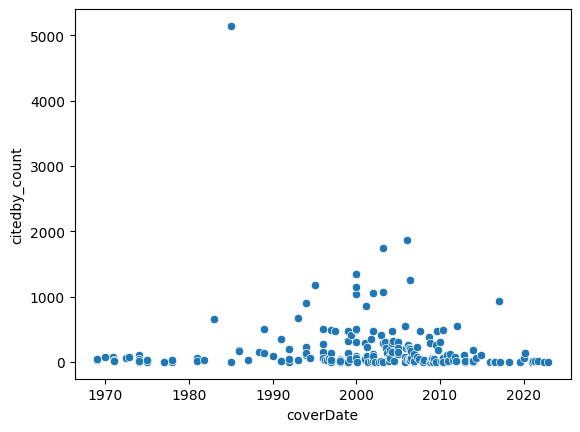

In [5]:
sns.scatterplot(x="coverDate", y="citedby_count", data=cit_uta)

<Axes: xlabel='coverDate', ylabel='citedby_count'>

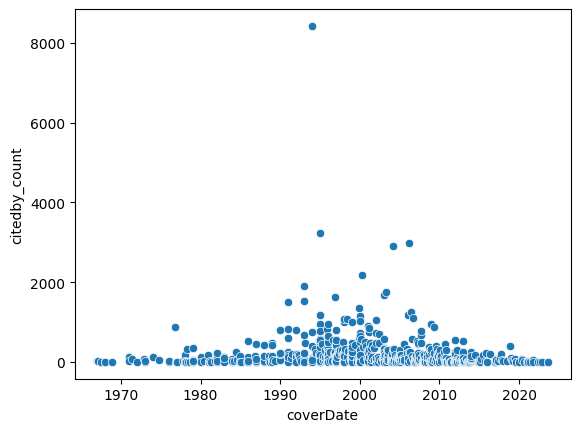

In [6]:
sns.scatterplot(x="coverDate", y="citedby_count", data=cit_chris)

### dd
cumulative citations
color by paper

<Axes: xlabel='coverDate', ylabel='cum_sum'>

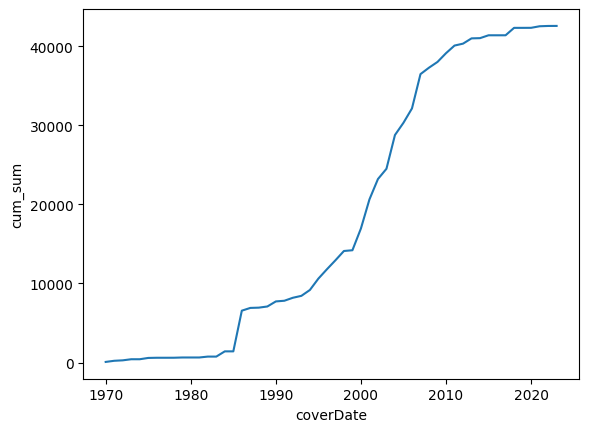

In [23]:
cum_uta = (
    cit_uta.groupby(pd.Grouper(key="coverDate", freq="1Y"))
    .sum()
    .reset_index()
    .sort_values("coverDate")
)
cum_uta["cum_sum"] = cum_uta["citedby_count"].cumsum()
cum_uta["year"] = cum_uta["coverDate"].dt.year
cum_uta["decade"] = cum_uta["year"] // 10 * 10

sns.lineplot(x=cum_uta["coverDate"], y=cum_uta["cum_sum"])

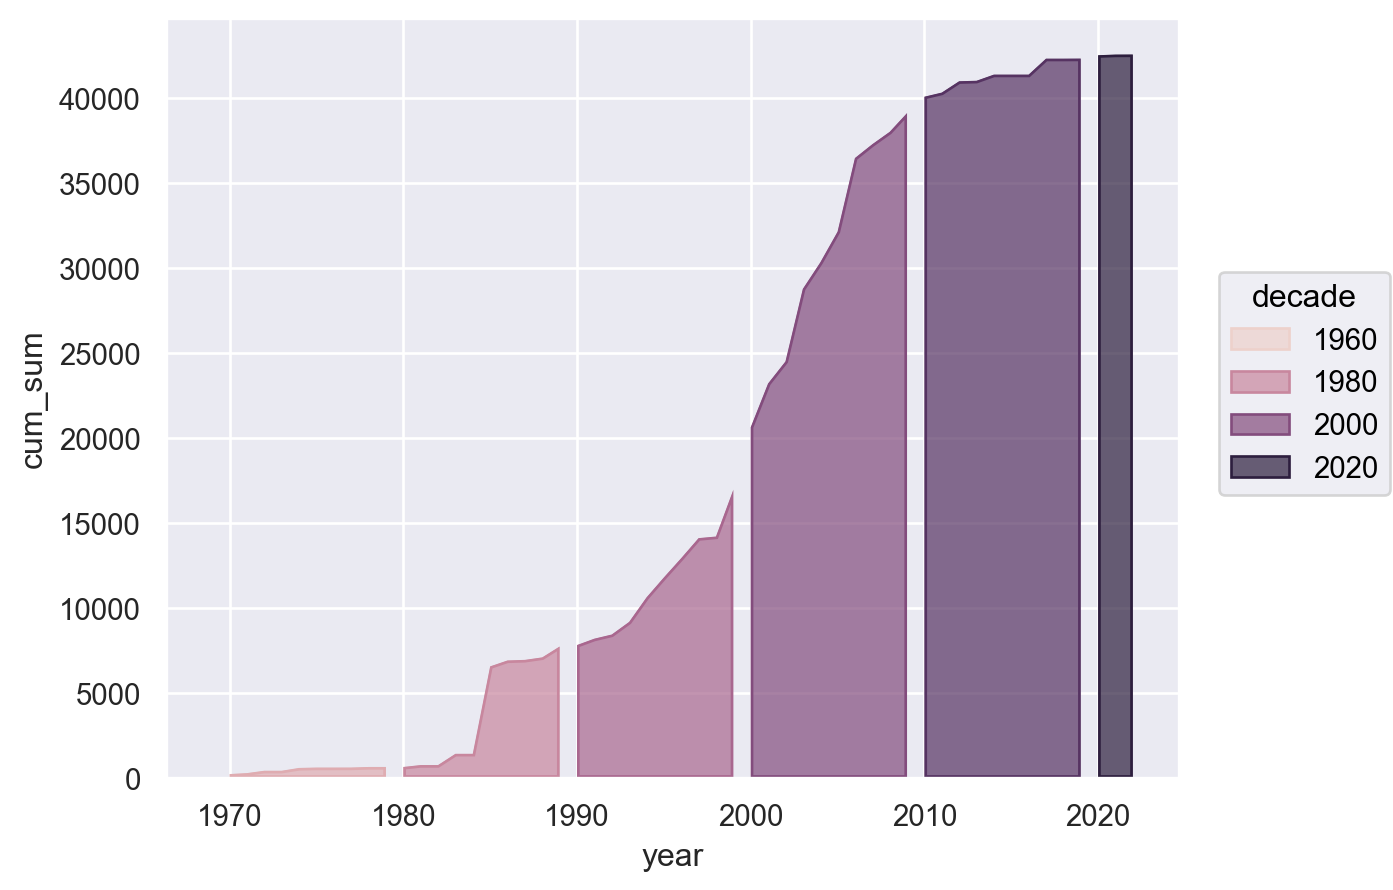

In [27]:
(so.Plot(cum_uta, "year", "cum_sum", color="doi").add(so.Area(alpha=0.7), so.Stack()))

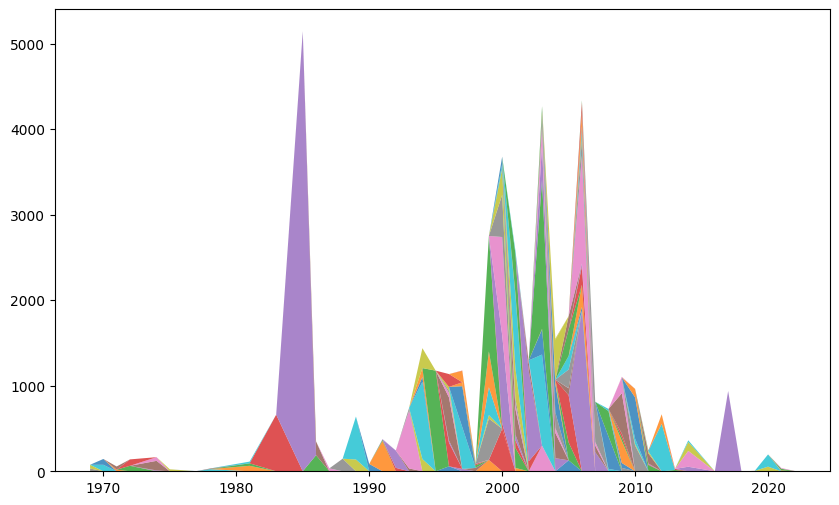

In [34]:
# Calculating cumulative sum for each topic
# cit_uta["year"] = cit_uta["coverDate"].dt.year
# cit_uta["cumulative_citations"] = cit_uta.groupby(["year"])["citedby_count"].cumsum()

# Reshape for plotting
pivot_df = cit_uta.pivot(index="year", columns="eid", values="cumulative_citations")
pivot_df.fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
plt.stackplot(pivot_df.index, pivot_df.T, labels=pivot_df.columns, alpha=0.8)
plt.show()

In [55]:
group_uta = cit_uta.groupby(["year", "eid"])['citedby_count'].sum().reset_index()
pivot_uta = group_uta.pivot(index="year", columns="eid", values="citedby_count").fillna(0)
cum_uta = pivot_uta.cumsum()
cum_uta_melt = cum_uta.reset_index().melt(id_vars="year", value_name="cumulative_citations")
cum_uta_melt

,year,eid,cumulative_citations
0,1969,2-s2.0-0000412988,0.0
1,1970,2-s2.0-0000412988,0.0
2,1971,2-s2.0-0000412988,0.0
3,1972,2-s2.0-0000412988,0.0
4,1974,2-s2.0-0000412988,0.0
...,...,...,...
9724,2018,2-s2.0-85148412361,0.0
9725,2019,2-s2.0-85148412361,0.0
9726,2020,2-s2.0-85148412361,0.0
9727,2021,2-s2.0-85148412361,9.0


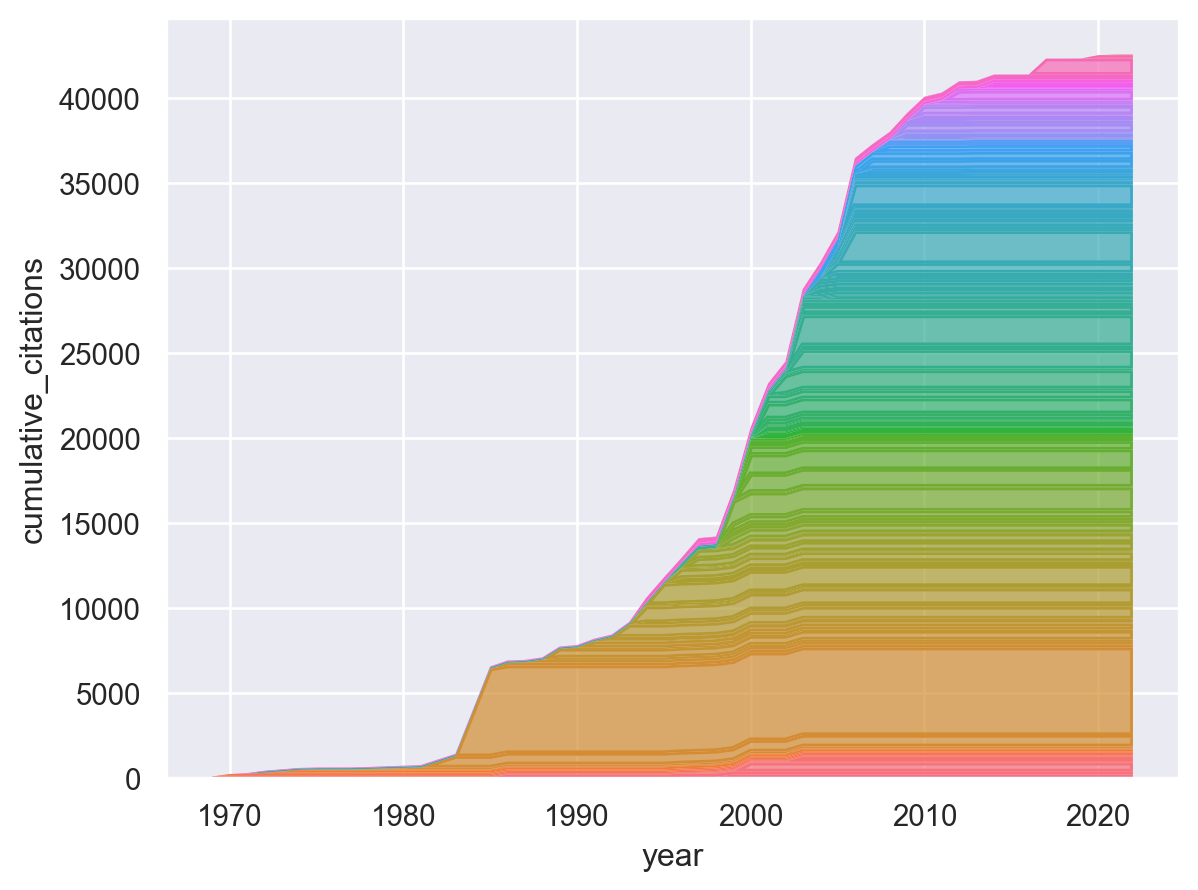

In [65]:
(so.Plot(cum_uta_melt, "year", "cumulative_citations", color="eid")
        .add(so.Area(alpha=0.7), so.Stack(), legend=False)
)

### cum plot

In [9]:
def cum_plot(df, x_col, y_col, hue_col, legend=False):
    """
    """
    group = df.groupby([x_col, hue_col])[y_col].sum().reset_index()
    pivot = group.pivot(index=x_col, columns=hue_col, values=y_col).fillna(0)
    cum = pivot.cumsum()
    cum_melt = cum.reset_index().melt(id_vars=x_col, value_name=f"cumulative_{y_col}")

    return (so.Plot(cum_melt, x_col, f"cumulative_{y_col}", color=hue_col)
        .add(so.Area(alpha=0.7), so.Stack(), legend=legend)
    )


In [11]:
cit_uta.groupby('author_count').size()

author_count
1      44
2      68
3      28
4      27
5      13
6       9
7       5
8       2
9       5
11      1
12      1
14      1
16      2
100     1
dtype: int64

/Users/au582299/Repositories/friths/.venv/lib/python3.11/site-packages/seaborn/_core/plot.py:1658: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.get_group(pd_key)
/Users/au582299/Repositories/friths/.venv/lib/python3.11/site-packages/seaborn/_core/plot.py:1658: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.get_group(pd_key)
/Users/au582299/Repositories/friths/.venv/lib/python3.11/site-packages/seaborn/_core/plot.py:1658: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.g

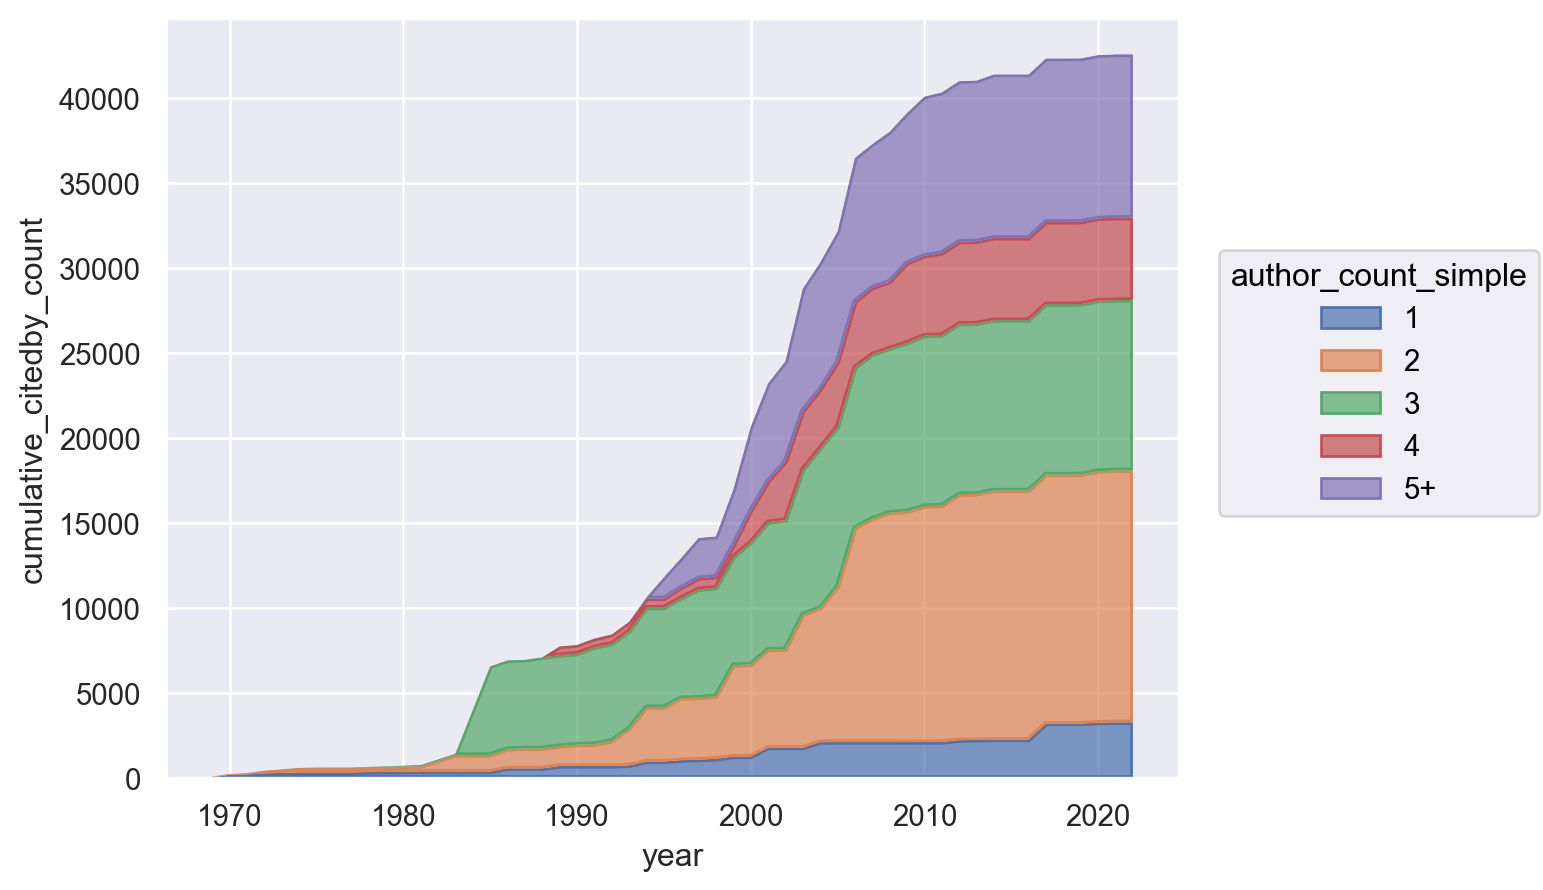

In [15]:
cit_uta['author_count_simple'] = cit_uta['author_count'].case_when([
    (cit_uta.eval("author_count >= 5"), "5+")
])

cum_plot(cit_uta, "year", "citedby_count", "author_count_simple", legend=True)

In [17]:
cit_chris.groupby('author_count').size()

author_count
1      75
2     121
3     121
4      98
5      86
6      80
7      44
8      27
9      15
10     12
11     10
12      3
13      2
14      4
15      3
16      3
21      1
44      1
58      1
dtype: int64

/Users/au582299/Repositories/friths/.venv/lib/python3.11/site-packages/seaborn/_core/plot.py:1658: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.get_group(pd_key)
/Users/au582299/Repositories/friths/.venv/lib/python3.11/site-packages/seaborn/_core/plot.py:1658: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.get_group(pd_key)
/Users/au582299/Repositories/friths/.venv/lib/python3.11/site-packages/seaborn/_core/plot.py:1658: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.g

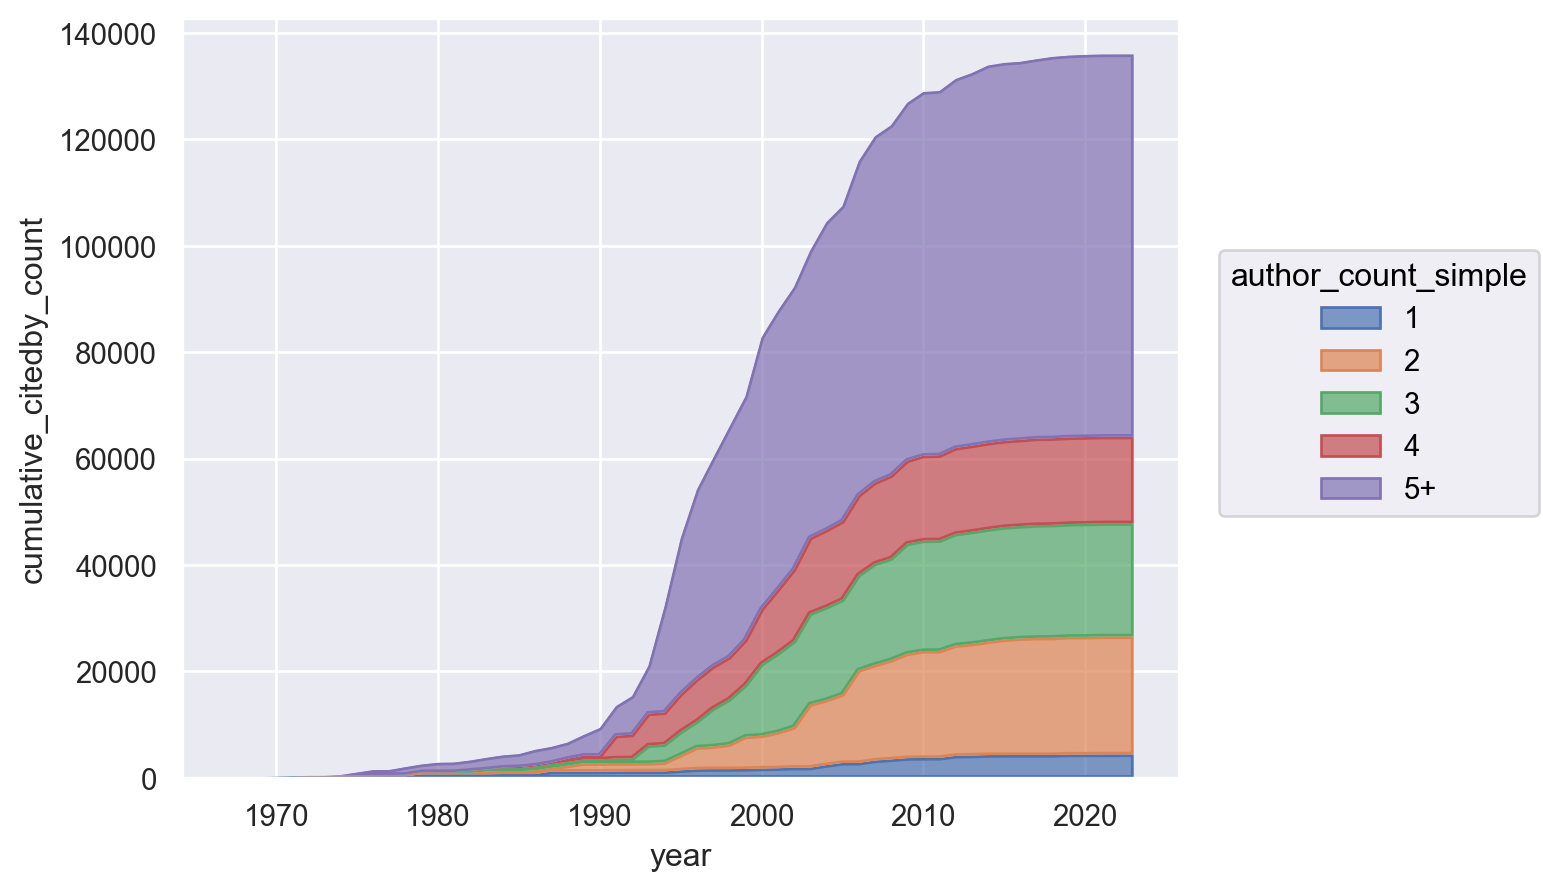

In [19]:
cit_chris['author_count_simple'] = cit_chris['author_count'].case_when([
    (cit_chris.eval("author_count >= 5"), "5+")
])

cum_plot(cit_chris, "year", "citedby_count", "author_count_simple", legend=True)

/Users/au582299/Repositories/friths/.venv/lib/python3.11/site-packages/seaborn/_core/plot.py:1658: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.get_group(pd_key)
/Users/au582299/Repositories/friths/.venv/lib/python3.11/site-packages/seaborn/_core/plot.py:1658: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.get_group(pd_key)
/Users/au582299/Repositories/friths/.venv/lib/python3.11/site-packages/seaborn/_core/plot.py:1658: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.g

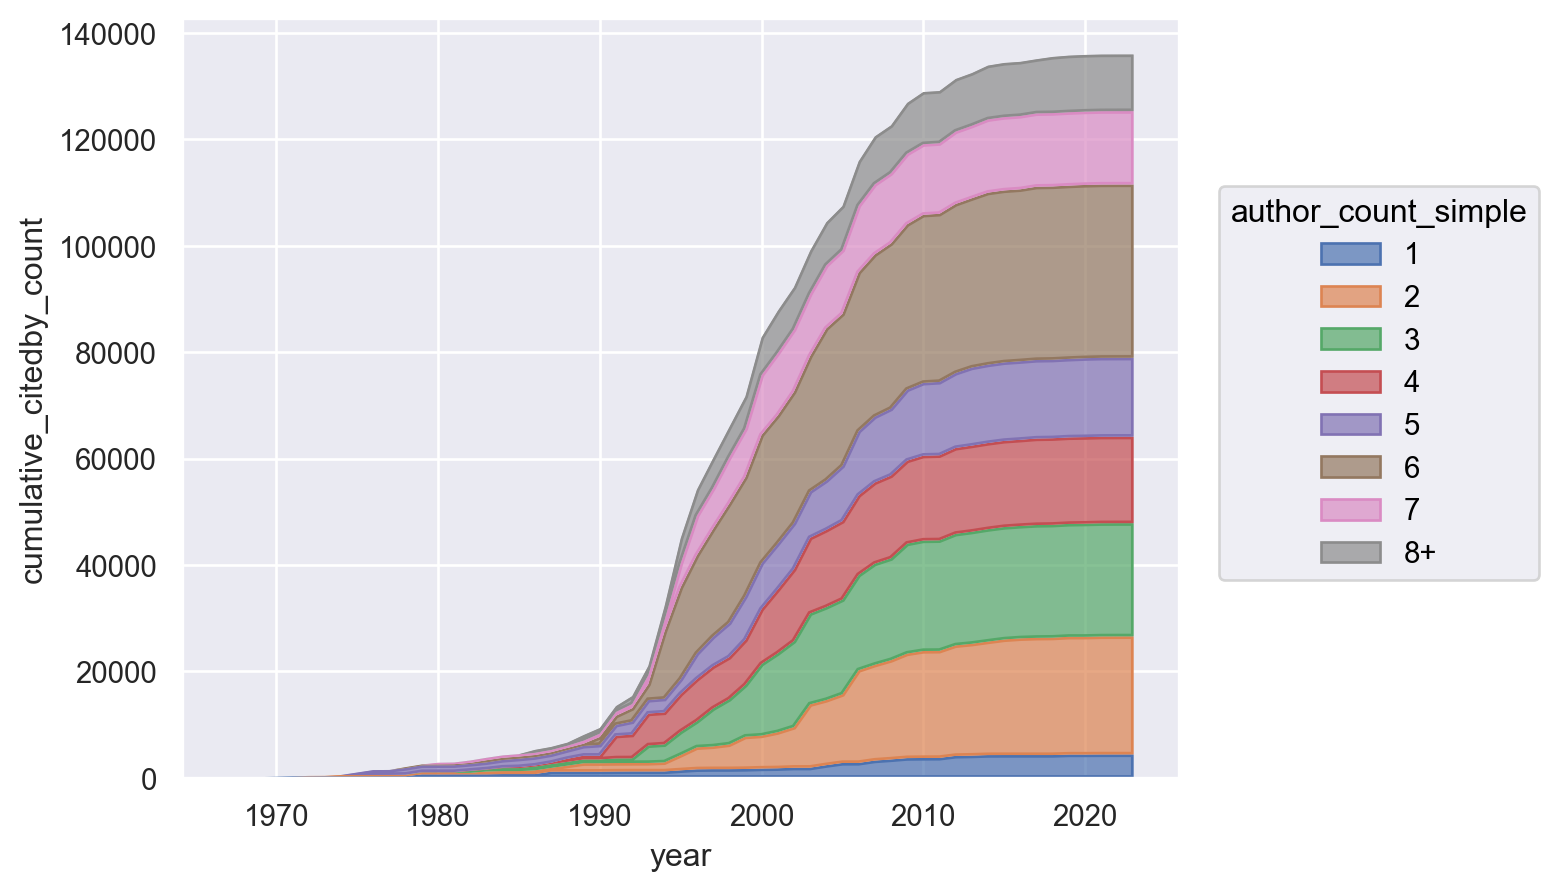

In [18]:
cit_chris['author_count_simple'] = cit_chris['author_count'].case_when([
    (cit_chris.eval("author_count >= 8"), "8+")
])

cum_plot(cit_chris, "year", "citedby_count", "author_count_simple", legend=True)

In [20]:
cit_uta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   eid                  207 non-null    object        
 1   doi                  181 non-null    object        
 2   pii                  62 non-null     object        
 3   pubmed_id            135 non-null    float64       
 4   title                207 non-null    object        
 5   subtype              207 non-null    object        
 6   subtypeDescription   207 non-null    object        
 7   creator              207 non-null    object        
 8   afid                 197 non-null    object        
 9   affilname            197 non-null    object        
 10  affiliation_city     195 non-null    object        
 11  affiliation_country  197 non-null    object        
 12  author_count         207 non-null    int64         
 13  author_names         207 non-null  